In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

# Data Exploration 

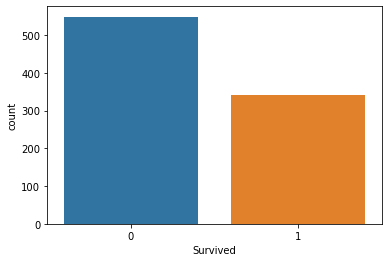

In [4]:
# How many passengers survived/died?

sns.countplot(train_data.Survived)
plt.show()

### Investigate sex

In [5]:
train_data['Sex'].str.get_dummies().corrwith(train_data['Survived']/train_data['Survived'].max())


female    0.543351
male     -0.543351
dtype: float64

There is a moderate positive correlation between being a female passengers and surviving whilst there is a moderate negative correaltion between being a male and surviving.

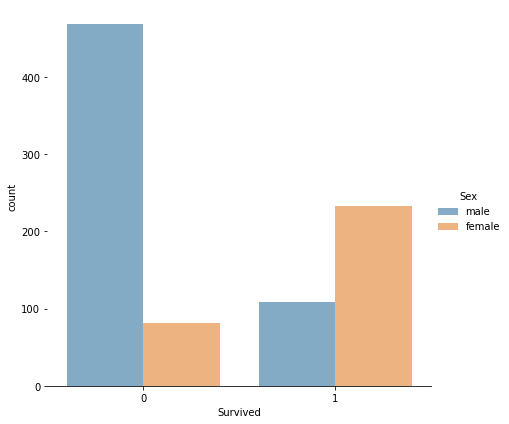

In [6]:
# Draw a nested barplot by survived and sex
g = sns.catplot(
    data=train_data, kind="count",
    x="Survived", hue="Sex",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)

In [7]:
#get correlation between survived and remaining numerical features
train_data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

According to the table above there is a weak negative correlation between Pclass, Fare and Survived

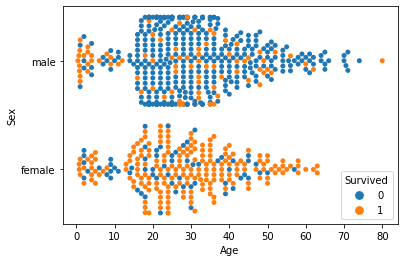

In [8]:
#Distribution by age, gender and Sex
ax = sns.swarmplot(data=train_data, x="Age", y="Sex", hue="Survived")

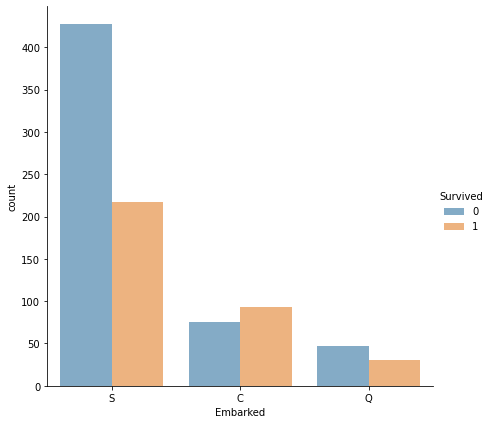

In [9]:
g = sns.catplot(
    data=train_data, kind="count",
    x="Embarked", hue="Survived",
    ci="sd", alpha=.6, height=6
)

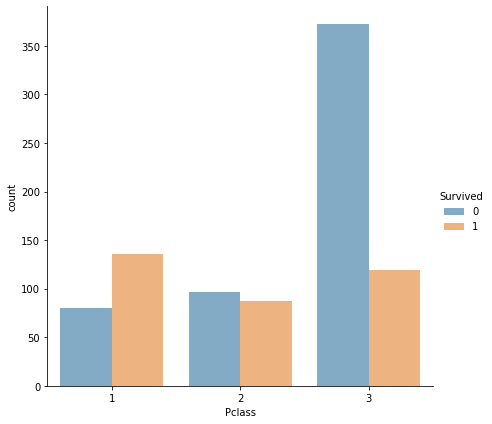

In [10]:
g = sns.catplot(
    data=train_data, kind="count",
    x="Pclass", hue="Survived",
    ci="sd", alpha=.6, height=6
)

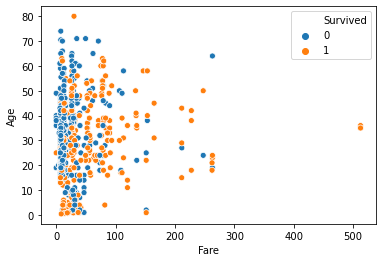

In [11]:
sns.scatterplot(data = train_data, x="Fare", y="Age",
                hue="Survived")

# Data cleaning 

Handle missing values

In [12]:
#Detect null values in different features (train_set)
print(round (train_data.isnull().sum().sort_values(ascending=False)/len(train_data)*100,1))
print("\n"
      "Age, Fare and Embarked has missing values")
print("Find passengers with missing values for Embarked:")
train_data.loc[train_data['Embarked'].isnull()]

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

Age, Fare and Embarked has missing values
Find passengers with missing values for Embarked:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
#Detect null values in different features (test_set)
print(round (test_data.isnull().sum().sort_values(ascending=False)/len(test_data)*100,1))

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
PassengerId     0.0
dtype: float64


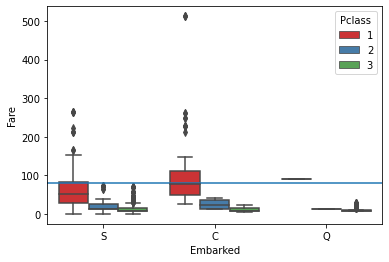

Median fare of first class from C is 80 $ -> passengers with missing values were probably embarked in Charbourg 


In [14]:
#Handling of missing values in Embarked 
#1. approach drop NA-values -> will drop whole row
#train_data.dropna()
#2.approach fill NA-values
#since Passengers that paid the same Fare should have same values for Embarked, we can examine this correlation
pplot =sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_data, palette="Set1")
pplot.axhline(80)
plt.show()

print("Median fare of first class from C is 80 $ -> passengers with missing values were probably embarked in Charbourg ")
#fill missing values with C
train_data.fillna(value = {'Embarked':0})
train_data['Embarked'] = train_data['Embarked'].fillna(value='C')

In [15]:
#fill missing values with C
test_data.fillna(value = {'Embarked':0})
test_data['Embarked'] = test_data['Embarked'].fillna(value='C')

In [16]:
train_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Cabin                          B28
Embarked                         C
Name: 61, dtype: object

In [17]:
#Find missing values for 'Age'
train_data.loc[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [18]:
#Handling null values in Age
#1.Approach mean filling of Age
#train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
#2. Approach predict age by taking median of groups having a certain sex and pclass
by_sex_class = train_data.groupby(['Sex', 'Pclass'])

def impute_median(series):
    return series.fillna(series.median())

train_data.Age = by_sex_class['Age'].transform(impute_median)

In [19]:
by_sex_class = test_data.groupby(['Sex', 'Pclass'])

def impute_median(series):
    return series.fillna(series.median())

test_data.Age = by_sex_class['Age'].transform(impute_median)

Impute missing values in 'Fare' (test_data) with mean

In [20]:
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)

Cabin should not have a great influence on passengers survival

In [21]:
train_data.drop(['Cabin'],axis = 1, inplace = True)
test_data.drop(['Cabin'],axis = 1, inplace = True)

## Categorical feature mapping

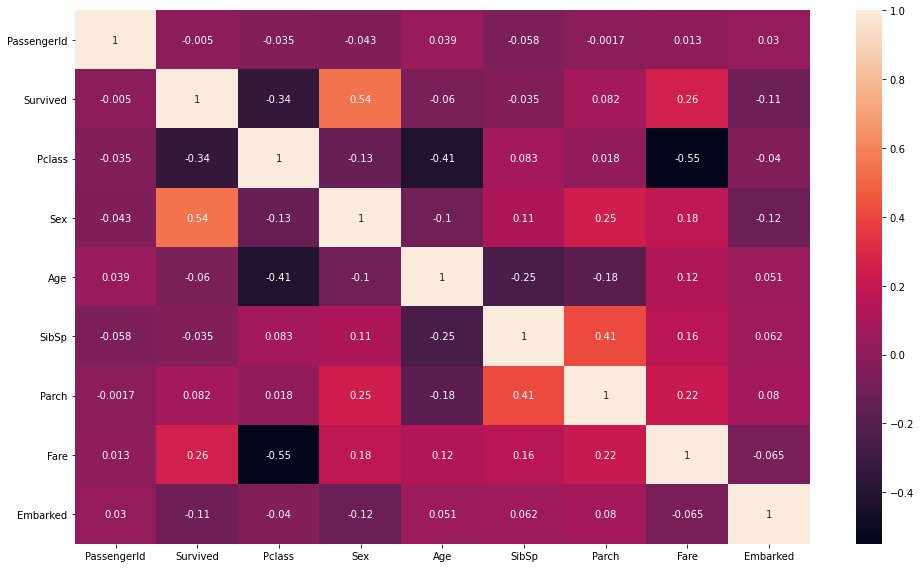

In [22]:
categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

categories = {"S":2, "C":1, "Q":0}
train_data['Embarked'] = train_data['Embarked'].map(categories)
test_data['Embarked'] = test_data['Embarked'].map(categories)

plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

### Feature selection

Delete features which don't seem to be relevant because they have a low correlation with Survived 

In [23]:
train_data.drop(['Name', 'Ticket'],axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket'],axis = 1, inplace = True)


In [24]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2
887,888,1,1,1,19.0,0,0,30.0000,2
888,889,0,3,1,21.5,1,2,23.4500,2
889,890,1,1,0,26.0,0,0,30.0000,1


# Train a ML model

In [25]:
X_train = train_data.drop(["Survived"], axis = 1)
y_train = train_data["Survived"].copy()

Scale the data using MinMaxNormalization before using it as an input for the Random Forest

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(test_data)

scaled_X_train = pd.DataFrame(scaled_train, columns=X_train.columns, index=X_train.index)
scaled_X_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

scaled_X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,0.0,0.271174,0.125,0.0,0.014151,1.0
1,0.001124,0.0,1.0,0.472229,0.125,0.0,0.139136,0.5
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0
3,0.003371,0.0,1.0,0.434531,0.125,0.0,0.103644,1.0
4,0.004494,1.0,0.0,0.434531,0.000,0.0,0.015713,1.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_rf = [{
    'n_estimators':[50,100,200],
    'max_depth': [2,3, None],
    'bootstrap': [True, False]
    
}]

clf_rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = clf_rf, param_grid = grid_rf, cv = 5, scoring = "accuracy")
grid_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False], 'max_depth': [2, 3, None],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy')

In [28]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=200)

In [29]:
grid_rf.best_score_

0.807005209967987

In [30]:
model = RandomForestClassifier(n_estimators = 100, max_depth= 3, bootstrap = False)
model.fit(scaled_X_train,y_train)
predictions = model.predict(scaled_X_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
output.to_csv('rf_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [31]:
output


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
